Catalin Alexandru Mihalache 09.10.2021 986965

In [75]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

TASK 2.1

iris_data contains 150 samples and 4 features <br> 
3 species of iris: Iris setosa, Iris virginica and Iris versicolor <br>
The features are:<br>
    - sepal lenght<br>
    - sepal width<br>
    - petal length<br>
    - petal width<br>
Iris_labels contains a label for each sample in iris_data

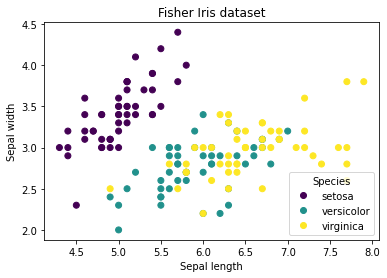

In [151]:
data = np.load('Iris_data.npy')
labels = np.load('Iris_labels.npy')

plt.figure()

cmap = plt.get_cmap('viridis')#color map
norm = plt.Normalize(labels.min(), labels.max())#normalizing colors
species = ['setosa', 'versicolor', 'virginica']#species of iris

plt.scatter(data[:, 0], data[:, 1], c = labels, cmap = 'viridis', norm = norm)#plotting the figure

handles = [plt.Line2D([0, 0], [0, 0], c = cmap(norm(i)), marker = 'o', linestyle = '', label = label)
           for i, label in enumerate(species)]# adding a legend

plt.legend(handles = handles, title = 'Species')#plotting the legend

plt.xlabel("Sepal length") 
plt.ylabel("Sepal width")
plt.title("Fisher Iris dataset")

plt.show()

TASK 2.2

Firstly, we initialize the k-means object <br>
Then, we fit our data and predict at the same time and the data will go into y_kmeans <br>
Then, we plot the predicted result<br>
We add the latest centroids <br>

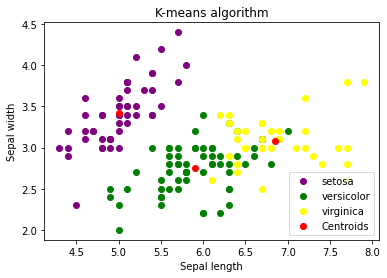

In [122]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 10, n_init = 10, random_state = 0)
#init - is a method to initiliaze the clustering
#n_init - is the number of time k-means will run with different centroid seeds

y_kmeans = kmeans.fit_predict(data)

plt.figure()

plt.scatter(data[y_kmeans == 1, 0], data[y_kmeans == 1, 1], c = 'purple', label = 'setosa')
plt.scatter(data[y_kmeans == 0, 0], data[y_kmeans == 0, 1], c = 'green', label = 'versicolor')
plt.scatter(data[y_kmeans == 2, 0], data[y_kmeans == 2, 1], c = 'yellow', label = 'virginica')

plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], c = 'red', label = "Centroids")

plt.legend()
plt.xlabel("Sepal length") 
plt.ylabel("Sepal width")
plt.title("K-means algorithm")

plt.show()

TASK 2.3

Firstly, we initiliaze the Gaussian Mixture Model object <br>
Then we fit and predict the result<br>
Then we scatter plot the predicted result and their means

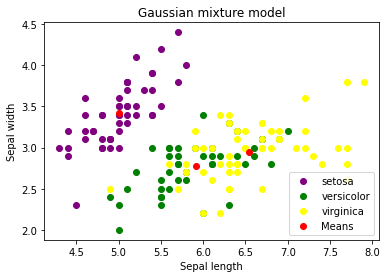

In [149]:
gmm = GaussianMixture(n_components = 3, covariance_type = 'full', init_params = 'kmeans')
y_gmm = gmm.fit_predict(data)

plt.figure()

plt.scatter(data[y_gmm == 1, 0], data[y_gmm == 1, 1], c = 'purple', label = 'setosa')
plt.scatter(data[y_gmm == 0, 0], data[y_gmm == 0, 1], c = 'green', label = 'versicolor')
plt.scatter(data[y_gmm == 2, 0], data[y_gmm == 2, 1], c = 'yellow', label = 'virginica')

plt.scatter(gmm.means_[:,0], gmm.means_[:,1], c = 'red', label = "Means")

plt.legend()
plt.xlabel("Sepal length") 
plt.ylabel("Sepal width")
plt.title("Gaussian mixture model")

plt.show()

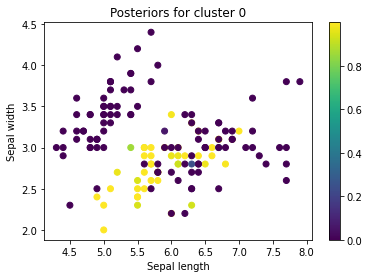

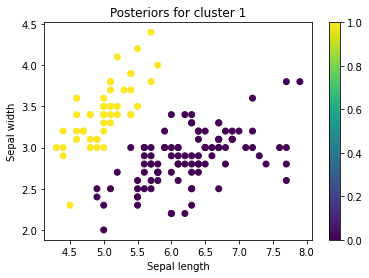

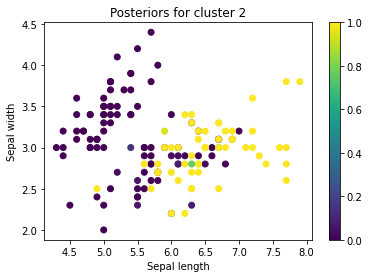

In [150]:
probabilities = gmm.predict_proba(data)

plt.figure()
# Visualisation of model posteriors
for i_component in range(3):
    plt.scatter(data[:, 0], data[:, 1], c = probabilities[:, i_component])
    plt.title(f'Posteriors for cluster {i_component}')
    plt.xlabel("Sepal length") 
    plt.ylabel("Sepal width")
    plt.colorbar()
    plt.show()

init_params - The method used to initialize the weights, the means and the precisions

TASK 2.4

(100, 10)


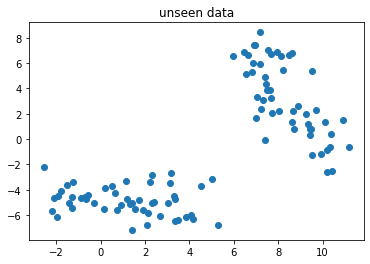

In [158]:
unseen_data = np.load('task2_4.npy')

print(unseen_data.shape)

plt.figure()
plt.scatter(unseen_data[:, 0], unseen_data[:, 1])
plt.title('unseen data')
plt.show()

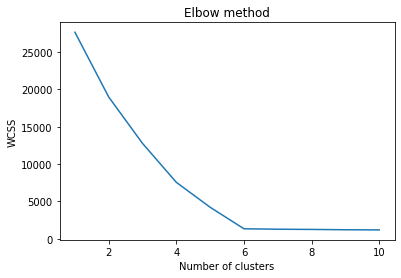

In [160]:
#finding the optimal number of clusters
wcss = [] # within cluster sum of squares
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 100, n_init = 10, random_state = 0)
    kmeans.fit(unseen_data)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,11), wcss)
plt.title("Elbow method")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()

As seen in the graph above, the optimal k is 6 as after 6 we have convergence

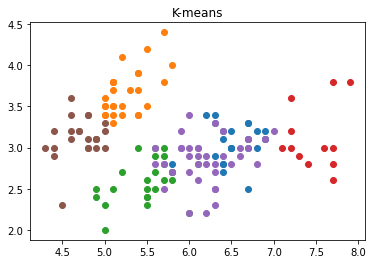

In [167]:
kmeans = KMeans(n_clusters = 6, init = 'k-means++', max_iter = 10, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(data)

plt.figure()

plt.scatter(data[y_kmeans == 1, 0], data[y_kmeans == 1, 1])
plt.scatter(data[y_kmeans == 0, 0], data[y_kmeans == 0, 1])
plt.scatter(data[y_kmeans == 2, 0], data[y_kmeans == 2, 1])
plt.scatter(data[y_kmeans == 3, 0], data[y_kmeans == 3, 1])
plt.scatter(data[y_kmeans == 4, 0], data[y_kmeans == 4, 1])
plt.scatter(data[y_kmeans == 5, 0], data[y_kmeans == 5, 1])

plt.title("K-means")

plt.show()